In [0]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive/My Drive/IADS-2019-Tree-Codes
# !pwd

# **Gradient Boosting for Regression**
### 1. Boston House Price dataset
### 2. House Sales in King County, USA






# 1. Boston House Price dataset


## Dataset for Regression



> **Dataset:**  [Boston house-price](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)



*   **Number of Instances:** 
    *   	506
*   **Number of Attributes:**
    *   13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

*   **Attribute Information:**
    *   CRIM per capita crime rate by town
    *   ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    *   INDUS proportion of non-retail business acres per town
    *   CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    *   NOX nitric oxides concentration (parts per 10 million)
    *   RM average number of rooms per dwelling
    *   AGE proportion of owner-occupied units built prior to 1940
    *   DIS weighted distances to five Boston employment centres
    *   RAD index of accessibility to radial highways
    *   TAX full-value property-tax rate per \$10,000
    *   PTRATIO pupil-teacher ratio by town
    *   B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    *   LSTAT \% lower status of the population
    *   MEDV Median value of owner-occupied homes in \$1000’s






In [0]:
# Add liberaries 
from sklearn import datasets  # DATA
from sklearn.model_selection import train_test_split # to Split Train-Test data
from sklearn import ensemble # To get Gradient Boosting regressor 
from sklearn import metrics # To generate evaluation metrices
from sklearn.model_selection import cross_val_predict # To estimate CV predicted outputs
from sklearn.model_selection import cross_val_score # To estimate CV score


from sklearn.tree import export_graphviz # exporting the tree structure as dot file
from pydotplus.graphviz import graph_from_dot_data # export png image from dot file
from IPython.display import Image, SVG # Show the image within colab notebook
from graphviz import Source
import matplotlib.pyplot as plt
# import seaborn as sns

import pandas as pd # for basic data exploration and manipulations 
import numpy as np # Numpy for data manipulations

from sklearn.model_selection import GridSearchCV # get gridsearch with cross validation


### 1. Load Data

In [0]:
#load data and see meta info
boston = datasets.load_boston()
dir(boston)

### 2. Explore Data


In [0]:
# print type and shape of data
print(type(boston.data))
print(type(boston.target))

print(boston.data.shape)
print(boston.target.shape)

### 3. Create Panda Dataframe and do data manipulations

In [0]:
dfReg = pd.DataFrame(boston.data, columns=boston.feature_names)
dfReg.head()

In [0]:
# Add target data to the panda dataframe
dfReg['target'] = boston.target
dfReg.head()

### 4. Split the data for Training and Testing

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dfReg.drop(['target'],axis='columns'),boston.target,test_size=0.1,random_state=123)
print(X_train.shape)
print(X_test.shape)

### 5. Initialise a Gradient Boosting Regressor

In [0]:
gbRegressor = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1,
                                                   n_estimators=100, subsample=1.0, 
                                                   criterion='friedman_mse', 
                                                   min_samples_split=2, min_samples_leaf=1, 
                                                   min_weight_fraction_leaf=0.0, max_depth=3, 
                                                   min_impurity_decrease=0.0, min_impurity_split=None, 
                                                   init=None, random_state=123, max_features=None, 
                                                   alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                                   warm_start=False, presort='auto', 
                                                   validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)



> ***Let's dig into*** **[tree.GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)**




### 6. Model Evaluation on Train data

In [0]:
CV_predicted = cross_val_predict(gbRegressor, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(gbRegressor, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)

In [0]:
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

### 7. Let's fit the GB model on Training data and perform prediction with the Test data 

In [0]:
gbRegressor_model = gbRegressor.fit(X_train,y_train)

y_predicted = gbRegressor_model.predict(X_test)

### 8. Model Evaluation on Test Data

In [0]:
r2_score = gbRegressor.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

### 9. Visualisation

In [0]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()

In [0]:
# Plot a one-to-one comparison of measured values vs predicted values
plt.figure(num=None, figsize=(25, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_predicted, 'gd-', label='GradientBoostingRegressor')
plt.plot(y_test, 'r*-', label='Actual values')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Target values')
plt.xlabel('Training samples')
plt.legend(loc="best")
plt.title('Comparison of individual sample predictions')
plt.show()

In [0]:
# Plot feature importance
feature_importance = gbRegressor_model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = range(X_train.shape[1]);

plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()

### 10. Let's do Grid Search

In [0]:
#provide GB hyperparameters
gb_hyperparameters = {
    "n_estimators": [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [1, 3, 5],
#     'loss' : ['ls', 'lad', 'huber', 'quantile'],
}

nfolds = 10 #number of folds for CV
gbRegressor = ensemble.GradientBoostingRegressor(random_state=123) #initialise GB classifier

# create Grid search object
gs_gb_rgr = GridSearchCV(gbRegressor, gb_hyperparameters, 
                          n_jobs=10, cv=nfolds)

In [0]:
gs_gb_rgr.fit(X_train, y_train) #fit the grid search object

In [0]:
print(gs_gb_rgr.best_score_)
print(gs_gb_rgr.best_params_)

In [0]:
best_parameters_gs = gs_gb_rgr.best_params_ #get the best parameters based on 10x CV grid search

### 11. Re-Initialise a Gradient Boosting Regressor

In [0]:
gbRegressor_best = ensemble.GradientBoostingRegressor(**best_parameters_gs) #intialise GB classifier with best set of parameters

### 12. Model Re-evaluation on Train data with best Parameters

In [0]:
#perform 10 fold cross validation and plot the CM
CV_predicted = cross_val_predict(gbRegressor_best, X_train, y_train, cv=10) #CV predicted values (training data)
CV_score = cross_val_score(gbRegressor_best, X_train, y_train, cv=10) #CV model score (training data)

print("Cross validation Score with best parameters on train data: ",CV_score.mean())

### 13. Model Re-evaluation on Test data with best Parameters

In [0]:
gbRegressor_best_mdl= gbRegressor_best.fit(X_train, y_train) #fit the best GB classifier with training data

y_predicted = gbRegressor_best_mdl.predict(X_test) #Predict the outcomes with best GB classifier for test data

In [0]:
mdl_score = gbRegressor_best_mdl.score(X_test,y_test) #model score (test data)
print ("Model Score with best parameters on test data:",mdl_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error with best parameters on test set :",mse_score)

# 1. House Sales in King County, USA dataset
[see description here](https://www.kaggle.com/harlfoxem/housesalesprediction)


### 1. Load data

In [0]:
#load data from local drive
housePriceData = pd.read_csv('kc_house_data.csv')
housePriceData.shape

### 2. Explore Data


In [0]:
housePriceData.head()

In [0]:
housePriceData = housePriceData.drop(['id', 'date'], axis=1) #remove 'id' and 'date' variables
housePriceData.head()

In [0]:
housePriceData.info()

In [0]:
housePriceData.describe()

### 3. Split the data for Training and Testing

In [0]:
target = housePriceData['price'] #get the labels as targets and convert to numpy array
np.array(target, dtype=pd.Series)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(housePriceData.drop(['price'],axis='columns'), target, test_size=0.2,random_state=123)
print(X_train.shape)
print(X_test.shape)

### 4. Let's do Grid Search

In [0]:
#provide GB hyperparameters
gb_hyperparameters = {
    "n_estimators": [100, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [1, 3],
#     'loss' : ['ls', 'lad', 'huber', 'quantile'],
}

nfolds = 10 #number of folds for CV
gbRegressor = ensemble.GradientBoostingRegressor(random_state=123) #initialise GB classifier

# create Grid search object
gs_gb_rgr = GridSearchCV(gbRegressor, gb_hyperparameters, cv=nfolds)

In [0]:
gs_gb_rgr.fit(X_train, y_train) #fit the grid search object

In [0]:
print(gs_gb_rgr.best_score_)
print(gs_gb_rgr.best_params_)

In [0]:
best_parameters_gs = gs_gb_rgr.best_params_ #get the best parameters based on 10x CV grid search

### 5. Initialise a Gradient Boosting Regressor

In [0]:
gbRegressor_best = ensemble.GradientBoostingRegressor(**best_parameters_gs, random_state=123) #intialise GB classifier with best set of parameters

### 6. Model Re-evaluation on Train data with best Parameters

In [0]:
#perform 10 fold cross validation and plot the CM
CV_predicted = cross_val_predict(gbRegressor_best, X_train, y_train, cv=10) #CV predicted values (training data)
CV_score = cross_val_score(gbRegressor_best, X_train, y_train, cv=10) #CV model score (training data)

print("Cross validation Score with best parameters on train data: ",CV_score.mean())

In [0]:
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

### 7. Model Re-evaluation on Test data with best Parameters

In [0]:
gbRegressor_best_mdl= gbRegressor_best.fit(X_train, y_train) #fit the best GB classifier with training data

y_predicted = gbRegressor_best_mdl.predict(X_test) #Predict the outcomes with best GB classifier for test data

In [0]:
mdl_score = gbRegressor_best_mdl.score(X_test,y_test) #model score (test data)
print ("Model Score with best parameters on test data:",mdl_score)

model_error = 1- mdl_score
print ("\nModel Error with best parameters on test set :",model_error)

### 8. Visualisation

In [0]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()

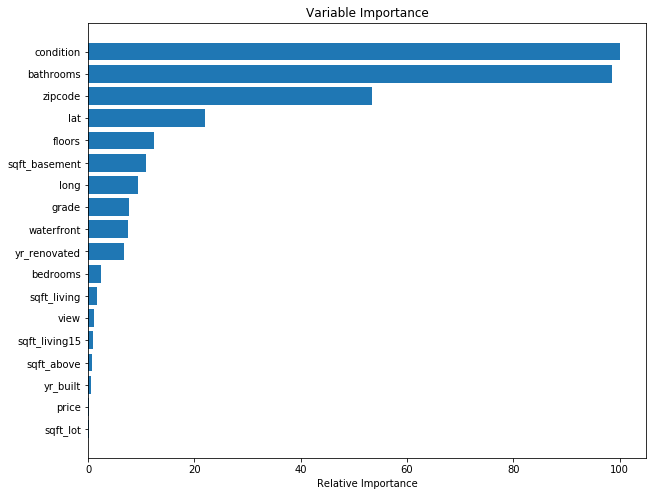

In [102]:
# Plot feature importance
feature_importance = gbRegressor_best_mdl.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = range(X_train.shape[1]);

array_features = np.asarray(list(housePriceData))
plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, array_features[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()